# Sinais degrau e impulso  em tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

import sympy as sym
%matplotlib widget

## Sinal impulso

O sistema dinâmico mais simples em tempo contínuo é o integrador. Então é razoável querermos um sinal bem simples que ao passar por um integrador tenha seja um sinal simples, como o valor 1.

Uma primeira tentativa que alguém poderia pensar seria

$x(t) = \left\{\begin{array}{cc}1 & t= 0 \\0 & \text{c.c} \end{array}\right.$

Porém, esse sinal tem a integral com valor igual a 0.

Uma outra tentativa é um pulso. É possível construir um pulso com duração $\Delta$ e altura $1/\Delta$.

$$\delta_\Delta(t) =  \left\{\begin{array}{cc}\frac{1}{\Delta} & 0 \leq t < \Delta \\0 & \text{c.c} \end{array}\right.$$


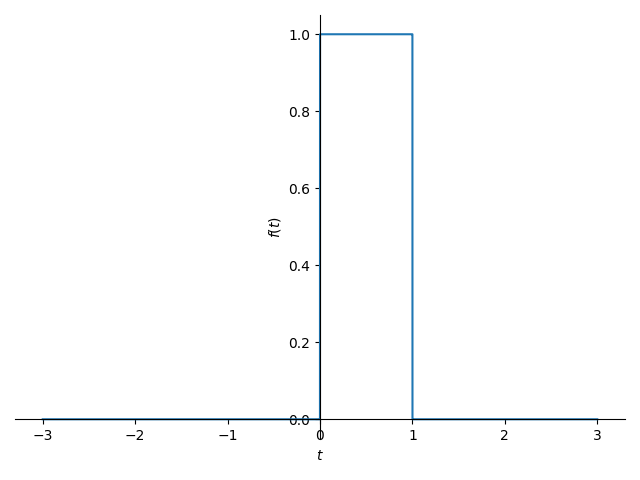

In [ ]:

t = sym.symbols('t')
x = sym.Piecewise((1, (t >= 0) & (t < 1)),
                  (0, True))

p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0,1])
ax.set_xticklabels(['0',r'$\Delta$'])
ax.set_yticks([1])
ax.set_yticklabels([r'$\frac{1}{\Delta}$'])
ax.set_ylabel(r'$\delta_{\Delta}(t)$')
fig.canvas.draw_idle()

A área desse pulso é 1. Nós podemos fazer a duração desse pulso ser cada vez menor. Com a duração cada vez menor, a altura do pulso fica cada vez menor. Se fizermos essa duração ir para zero, no limite temos o impulso.

$\delta(t)=\displaystyle\lim_{\Delta\rightarrow0}\delta_\Delta(t) $

Então definimos o **impulso** ou **delta de Dirac**, representado pelo símbolo $\delta(t)$:

$$\delta(t) = \left\{\begin{array}{cc}\infty & ,t = 0 \\ 0& ,\text{c.c} \end{array}\right.$$

e

$$\int_{-\infty}^\infty\delta(\tau)\,d\tau = 1$$

Representamos o delta de Dirac com uma seta com a área do impulso sendo indicada do lado.

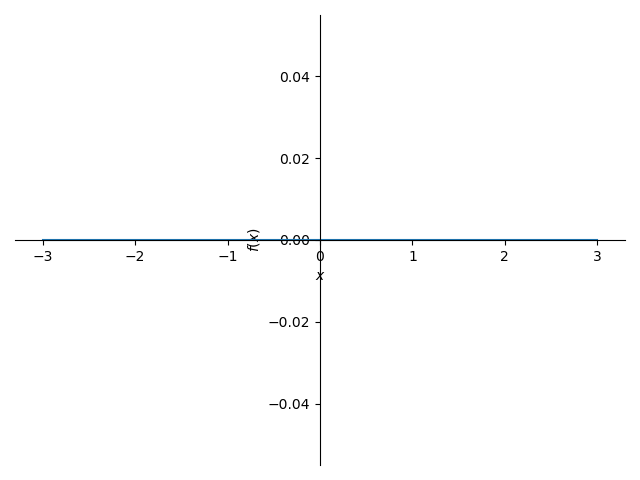

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0])
ax.set_xticklabels(['0'])
ax.set_yticks([1])
ax.set_yticklabels(['1'])
ax.set_ylabel(r'$\delta(t)$')
ax.set_xlabel(r'$t$')
ax.arrow(0,0,0,1, width=0.03, head_width = 0.2, head_length=0.1)
fig.canvas.draw_idle()

É importante notar que o impulso é uma idealização de um sinal de grande amplitude que tem uma duração muito pequena (idealmente duração zero). Esse sinal não acontece na prática, mas nos ajuda a estudar sistemas contínuos lineares e invariantes no tempo e a ganhar intuição sobre o comportamento desses sistemas.

### Propriedade da amostragem

Ao multiplicar um sinal $x(t)$ pelo delta de Dirac, temos:

$x(t)\delta(t) = x(0)\delta(t)$

Se multiplicamos o sinal pelo impulso atrasado, temos:

$x(t)\delta(t-T) = x(T)\delta(t-T)$

Ao calcular a área desse sinal $x(t)$ multiplicado por $\delta(t-T)$, temos:

$\int_{-\infty}^\infty x(\tau)\delta(\tau-T)\,d\tau = \int_{-\infty}^\infty x(T)\delta(\tau-T)\,d\tau =  x(T)\int_{-\infty}^\infty \delta(\tau-T)\,d\tau = x(T)$

Isso significa que a área do sinal multiplicado por impulso é o valor do sinal no instante em que o impulso está localizado.

## Sinal degrau

Outro sinal que usaremos bastante é o sinal degrau. Esse sinal também é conhecido como **degrau de Heaviside**. Esse sinal é sempre igual a 1 para $t\geq 0$. Para esse sinal usaremos a letra $u$:

$$u(t) =   \left\{\begin{array}{cc}1& ,t > 0 \\ 0& ,t<0 \end{array}\right. $$

Note que o degrau não é definido para $t=0$.
O seu gráfico é mostrado abaixo:

In [ ]:
x = sym.Piecewise((1, t > 0),
                  (0, True))

p1 = sym.plot(x, (t, -4, 10))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$u(t)$')
fig.canvas.draw_idle()

Os sinais degrau e impulso estão bastante relacionados. O sinal degrau  é a integral do impulso.

$$u(t) = \int_{-\infty}^t \delta(\tau)\,d\tau$$

E, como consequência, o delta de Dirac é a derivada do degrau:

$$\delta(t) = \frac{du(t)}{dt} $$

## Exercícios

**1)** Considere um sinal periódico:

$$x(t) = \left\{\begin{array}{cc} 3 &,0\leq t<2 \\ -1&,2\leq t<3 \end{array}\right.$$

Fora desses valores de tempo, o sinal se repete, com período $T=3$.

A derivada desse sinal está relacionada ao "trem de impulsos":

$g(t) = \displaystyle\sum_{k=-\infty}^\infty\delta(t-3k)$

com período $T=3$.

Pode-se perceber que:

$\frac{dx}{dt} = A_1g(t-t_1) + A_2g(t-t_2) + A_3g(t-t_3)$

Determine os valores de $A_1$, $A_2$ e $A_3$.

**2)** Mostre que:

$$\delta(2t) = \frac{1}{2}\delta(t)$$

Dica: veja a definição da função $\delta_\Delta(t)$.

**3)** Faça gráficos dos seguintes sinais:

a) $x_1(t) = 10e^{-3t}u(t)$

b) $x_2(t) = -10e^{-0.5t}u(t)$

c) $x_3(t) = -10e^{-0.5t}u(t-5)$

d) $x_4(t) = 10(1-e^{-t})u(t)$

e) $x_5(t) = 3^{-tu(t)}$


**4)** Faça o gráfico das seguintes funções:

a) $x_1(t) = u(t-3) - u(t-7) $

b) $x_2(t) = u(t-3) + u(t-7)$

c) $x_3(t) = t^2[u(t-3) + u(t-7)]$

d) $x_4(t) = (t-3)[u(t-3) + u(t-7)]$

**5)** Escreva a função com os gráficos abaixo usando apenas uma expressão. Além disso, calcule uma expressão para as suas derivadas.

a)

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((t+2, (t >= -2) & (t < 0)),
                  (2-2*t, (t >= 0) & (t < 1)),
                  (0, True))

sym.plot(x, (t, -3, 3))


b) No gráfico abaixo, o trecho com $t$ de 0 a 1 é $t^2$.

In [ ]:
t = sym.symbols('t')
x = sym.Piecewise((t**2, (t >= 0) & (t < 1)),
                  (2-t, (t >= 1) & (t < 3)),
                  (0, True))

sym.plot(x, (t, -3, 5))

**6)** Calcule as seguintes integrais:

a) $\int_{-\infty}^\infty\delta(\tau)x(t-\tau)\,d\tau$

b) $\int_{-\infty}^\infty\delta(t-\tau)x(\tau)\,d\tau$

c) $\int_{-\infty}^\infty\delta(2\tau-4)\mathrm{sen}(\pi \tau)\,d\tau$

d) $\int_{-\infty}^\infty\delta(\tau)e^{-j\omega \tau}\,d\tau$

e) $\int_{-\infty}^\infty\delta(\tau+2)e^{-\tau}\,d\tau$

f) $\int_{-\infty}^\infty\delta(1-\tau)(t^2+ 4)\,d\tau$

**7)** Escreva a função com as expressões abaixo usando apenas uma expressão (sem as condições do tempo). Além disso, calcule uma expressão para as suas derivadas e faça o seu gráfico.

a) $x(t) = \left\{\begin{array}{cc}\cos(\pi t)&0 \leq t\leq 1 \\ 0 & c.c \end{array}\right.$

b) $x(t) = \left\{\begin{array}{cc}1-e^{-t}&0 \leq t \leq 1 \\ (1-e^{-1})e^{-2(t-1)} & 1 < t\leq 3 \\ 0 & c.c\end{array}\right.$

c) $x(t) = \left\{\begin{array}{cc}t&0 \leq t \leq 1 \\ e^{3(t-1)} & 1 < t\leq 4 \\ 0 & c.c\end{array}\right.$

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)

## Solução dos exercícios

**3-)** Resolvido por Gabriel Sanches Oliveira

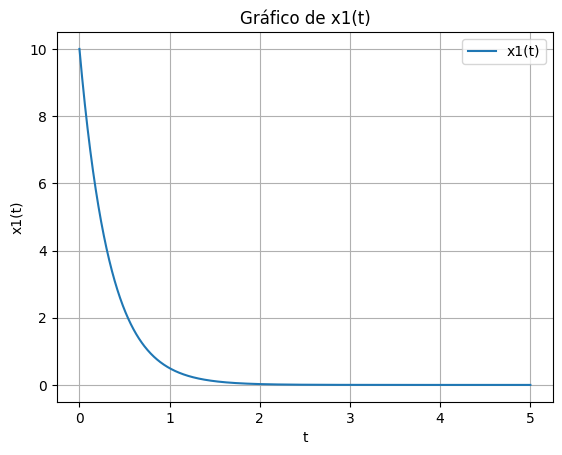

In [1]:
#3a)
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)

x1 = 10 * np.exp(-3 * t) * np.where(t >= 0, 1, 0)

plt.plot(t, x1, label='x1(t)')
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.title('Gráfico de x1(t)')
plt.legend()
plt.grid(True)

plt.show()

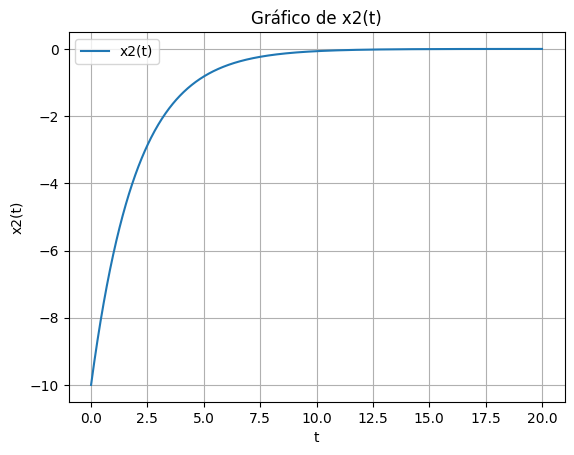

In [2]:
#3b)
t = np.linspace(0, 20, 1000)

x2 = -10 * np.exp(-0.5 * t) * np.where(t >= 0, 1, 0)

plt.plot(t, x2, label='x2(t)')
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.title('Gráfico de x2(t)')
plt.legend()
plt.grid(True)

plt.show()

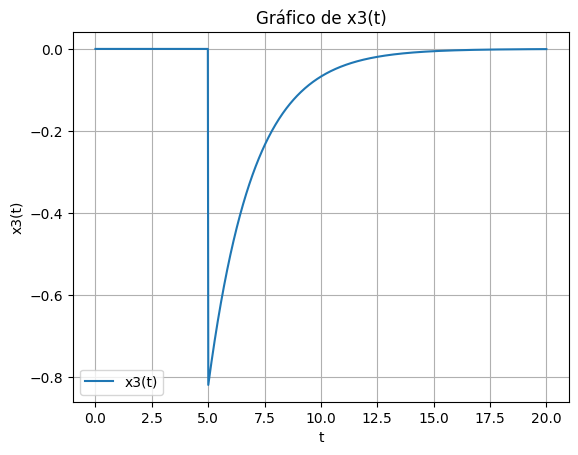

In [3]:
#3c)
t = np.linspace(0, 20, 1000)
x3 = -10 * np.exp(-0.5 * t) * np.where(t >= 5, 1, 0)

plt.plot(t, x3, label='x3(t)')
plt.xlabel('t')
plt.ylabel('x3(t)')
plt.title('Gráfico de x3(t)')
plt.legend()
plt.grid(True)

plt.show()

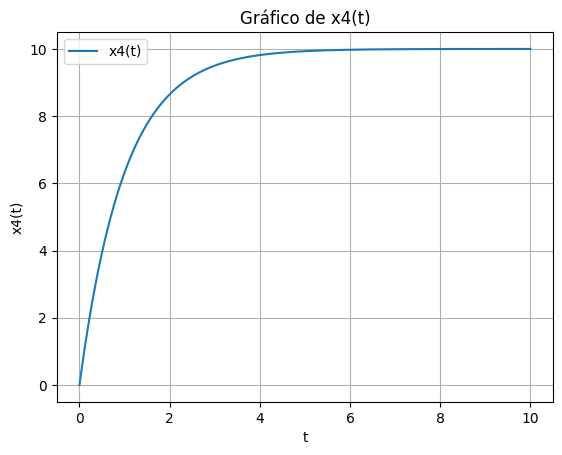

In [4]:
#3d)
t = np.linspace(0, 10, 1000)
x4 = 10 * (1 - np.exp(-t)) * np.where(t >= 0, 1, 0)

plt.plot(t, x4, label='x4(t)')
plt.xlabel('t')
plt.ylabel('x4(t)')
plt.title('Gráfico de x4(t)')
plt.legend()
plt.grid(True)

plt.show()

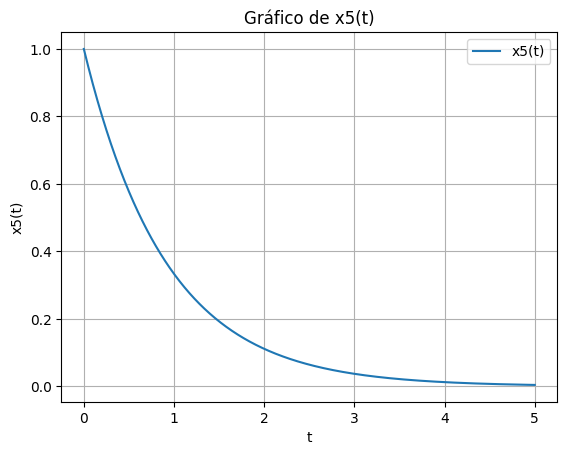

In [6]:
#3e)
t = np.linspace(0, 5, 1000)
x5 = 3**(-t) * np.where(t >= 0, 1, 0)

plt.plot(t, x5, label='x5(t)')
plt.xlabel('t')
plt.ylabel('x5(t)')
plt.title('Gráfico de x5(t)')
plt.legend()
plt.grid(True)

plt.show()

**4-)** Resolvido por Gabriel Sanches Oliveira

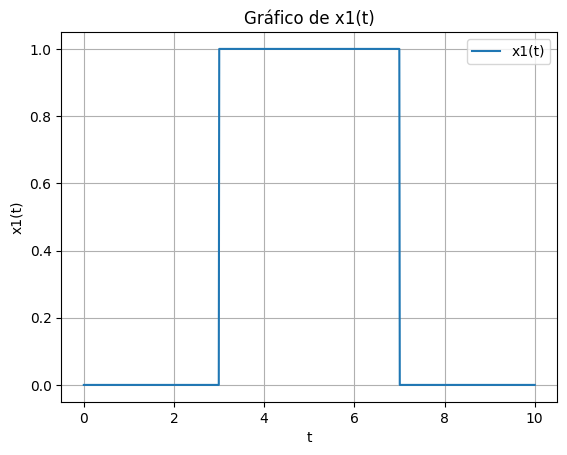

In [5]:
#4a)
t = np.linspace(0, 10, 1000)
x1 = np.where((t >= 3) & (t < 7), 1, 0)

plt.plot(t, x1, label='x1(t)')
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.title('Gráfico de x1(t)')
plt.legend()
plt.grid(True)

plt.show()

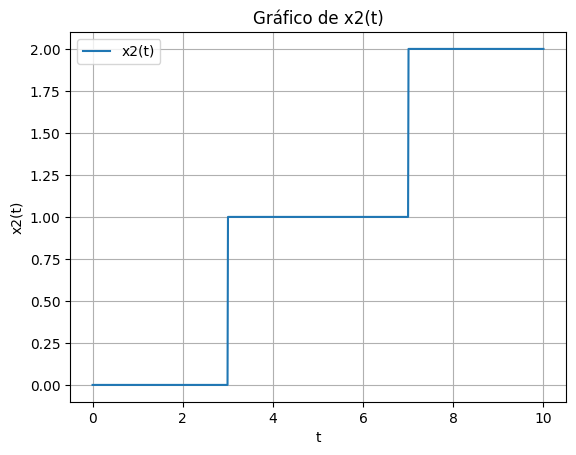

In [8]:
#4b)
t = np.linspace(0, 10, 1000)
x2 = np.where(t >= 3, 1, 0) + np.where(t >= 7, 1, 0)

plt.plot(t, x2, label='x2(t)')
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.title('Gráfico de x2(t)')
plt.legend()
plt.grid(True)

plt.show()

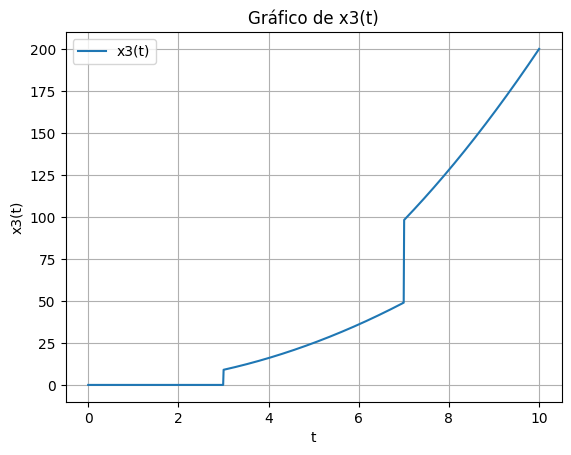

In [7]:
#4c)
t = np.linspace(0, 10, 1000)
x3 = t**2 * (np.where(t >= 3, 1, 0) + np.where(t >= 7, 1, 0))

plt.plot(t, x3, label='x3(t)')
plt.xlabel('t')
plt.ylabel('x3(t)')
plt.title('Gráfico de x3(t)')
plt.legend()
plt.grid(True)

plt.show()

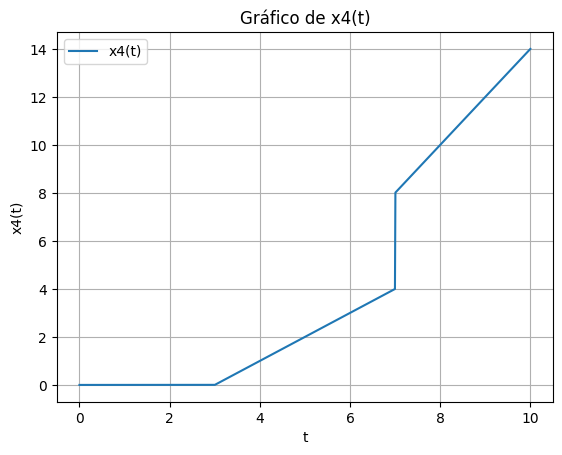

In [9]:
#4d)
t = np.linspace(0, 10, 1000)
x4 = (t - 3) * (np.where(t >= 3, 1, 0) + np.where(t >= 7, 1, 0))

plt.plot(t, x4, label='x4(t)')
plt.xlabel('t')
plt.ylabel('x4(t)')
plt.title('Gráfico de x4(t)')
plt.legend()
plt.grid(True)

plt.show()

**Exercício 5** Resolvido por Gabriel Sanches Oliveira

a)

$x(t)= (t+2)[u(t+2)-u(t)]+(-2t+2)[u(t)-u(t-1)]$

A derivada fica

$x'(t)= 2\delta(t+2)+u(t+2)+t\delta(t+2)-3u(t)-3t\delta(t)-2\delta(t-1)+2u(t-1)+2t\delta(t-1)$

b)

$x(t)=t^2u(t)-t^2u(t-1)+(-t+2)u(t-1)-(-t+2)u(t-3)$

A derivada fica:

$x'(t)=2tu(t)+t^2\delta(t)-2tu(t-1)-t^2\delta(t-1)-u(t-1)-t\delta(t-1)+2\delta(t-1)+u(t-3)+t\delta(t-3)-2\delta(t-3)$